In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Step 1 

The datasets is combined with decompose rate and plastic type/code. For the year-scale attribute is preprocessed. 

In [2]:
df = pd.read_csv('#1decomposeRate.csv')
df.head()

,index,item,time,year-scale,plasticType,plasticCode
0,1,Paper Plate,1 week- 2 months,0.1,PP,5
1,2,Banana/Orange peel,2-5 weeks,0.1,Non-plastic,0
2,3,Cotton Rag,1-5 months,0.3,Non-plastic,0
3,4,Rope,3- 14 months,1.0,PET,1
4,5,Newspaper,3-6 months,0.5,Non-plastic,0


# Step 2

Check the distribution of year-scale for next use. From that, the original item is listed about the year facter and the item type factor.

(array([17.,  5.,  1.,  2.,  7.,  1.,  0.,  0.,  0.,  1.]),
 array([5.00000e-02, 1.00045e+02, 2.00040e+02, 3.00035e+02, 4.00030e+02,
        5.00025e+02, 6.00020e+02, 7.00015e+02, 8.00010e+02, 9.00005e+02,
        1.00000e+03]),
 <a list of 10 Patch objects>)

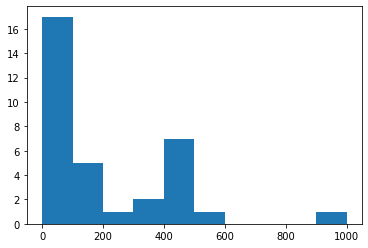

In [3]:
plt.hist(df['year-scale'],bins=10)

(array([12.,  3.,  1.,  0.,  0.,  3.,  0.,  6.,  4.,  5.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

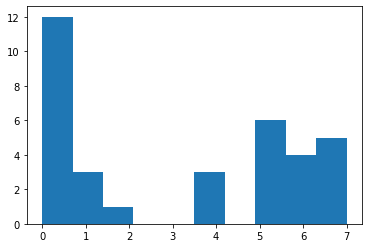

In [6]:
plt.hist(df['plasticCode'],bins=10)

# Step 3

Normalize decomposition rate (which presented as year-scale) and item types (which prsented as plastic code) in the same scale level.

In [7]:
from sklearn import preprocessing
timescaled = preprocessing.scale(df['year-scale'])
codescaled = preprocessing.scale(df['plasticCode'])

In [8]:
df['timescaled']=timescaled
df['codescaled']=codescaled
df.describe()

,index,year-scale,plasticCode,timescaled,codescaled
count,34.000000,34.000000,34.000000,3.400000e+01,3.400000e+01
mean,17.500000,214.611765,3.117647,-9.143013e-17,1.306145e-17
std,9.958246,247.210405,2.825905,1.015038e+00,1.015038e+00
min,1.000000,0.050000,0.000000,-8.809841e-01,-1.119829e+00
25%,9.250000,1.050000,0.000000,-8.768781e-01,-1.119829e+00
50%,17.500000,125.000000,4.000000,-3.679432e-01,3.169328e-01
75%,25.750000,437.500000,5.750000,9.151723e-01,9.455163e-01
max,34.000000,1000.000000,7.000000,3.224780e+00,1.394505e+00


# Step 4 

Choose the presentive item from random selection. Train dataset is based from exsting data and would find the relative harm index in their scale. The harm index in train may have subjective issue. Since the train dataset is small. In this step, it just implement simple validation. 

In [72]:
# train and test ready 
train = pd.read_csv('train.csv')
train.head()
#train.to_csv('train.csv',index=False)

,index,item,time,year-scale,plasticType,plasticCode,timescaled,codescaled,harmIndex
0,9,Plastic bag,10-20 years,15.00,LDPE,4,-0.819600,0.316933,2
1,28,yogurt cups,200 years,200.00,PP,5,-0.059995,0.676123,4
2,6,Carry-out food bag,4-8 month,0.60,LDPE,4,-0.878726,0.316933,1
3,31,electronic items,500 years,500.00,PS,6,1.171795,1.035314,5
4,17,Toilet Paper/Napkins,1-3 weeks,0.05,Non-plastic,0,-0.880984,-1.119829,1


In [56]:
test = df[~df.index.isin(train.index)]
test.head()

,index,item,time,year-scale,plasticType,plasticCode,timescaled,codescaled
17,18,Plastic cup,450 years,450.0,PS,6,0.966497,1.035314
18,19,Coffe pod,500 years,500.0,PS,6,1.171795,1.035314
19,20,Plastic water bottle,450 years,450.0,PET,1,0.966497,-0.760639
20,21,plastic straw,200 years,200.0,PP,5,-0.059995,0.676123
21,22,6-pack plastic rings,400 years,400.0,PP,5,0.761198,0.676123


In [52]:
x_train = train[['timescaled','codescaled']]
y_train = train['harmIndex']

# Step 5 
Model selection. For this question, use general linear regression and classify would work for this situation.

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes",'LinearLasso']
packages = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    linear_model.Lasso(alpha=0.26)]
for name, clf in zip(names,packages):
    clf.fit(x_train, y_train)
    score = clf.score(x_train, y_train) # Since the train set is small, only compare it with itself
    print(name ," : ", score)

Nearest Neighbors  :  0.7058823529411765
Linear SVM  :  0.29411764705882354
RBF SVM  :  0.7647058823529411
Decision Tree  :  1.0
Random Forest  :  1.0
Neural Net  :  0.7647058823529411
AdaBoost  :  0.7058823529411765
Naive Bayes  :  1.0
LinearLasso  :  0.8089009310874775


In this case, use LinearLasso for next step. 

In [54]:
reg = linear_model.Lasso(alpha=0.26)
reg.fit(x_train, y_train)

Lasso(alpha=0.26, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

The parameters for linear regression 

In [55]:
print(reg.coef_)
print(reg.intercept_)

[1.26845566 0.01314232]
3.1294208731712287


In [63]:
res = []
y = reg.predict(test[['timescaled','codescaled']])
for i in y:
    if i < 2:
        res.append(1)
    elif i > 5:
        res.append(5)
    else:
        res.append(int(round(i)))

In [64]:
test['harmIndex'] = res

In [82]:
cleanindex = train.append(test)

In [85]:
cleanindex.sort_values(by=['index'], inplace=True, ascending=True)
cleanindex.to_csv('cleanIndex.csv',index=False)

# Step 6 

Give harm index for selected plastic items. Based on the predict harm index, find the related or exsting item in data set, which would have the selected item index.
